In [ ]:
# This notebook is a descendent from "Gradient Correction 1.ipynb" i  "Gradient Correction 2.ipynb"

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Change directory
%cd 'drive/My Drive/results/synthetic_init/'

/content/drive/My Drive/results/synthetic_init


In [4]:
#!pip uninstall gradient_correction  
!pip install https://github.com/Antonio-Ionaton/GradientCorrection/tarball/main

     - 47.4 MB 13.6 MB/s
  Created wheel for gradient-correction: filename=gradient_correction-0.1-py3-none-any.whl size=10764 sha256=88c560fd51641bb7a530a981af20078e877be7e1c35c14f1a6718613c89fac85
  Stored in directory: /tmp/pip-ephem-wheel-cache-xis9mskz/wheels/03/4c/0a/9516d8fa386ed9a21d1aa50e8cc5b1f6d6f576195897b24409
Successfully built gradient-correction


In [5]:
import numpy as np
#import gradient_correction
from gradient_correction import  helper, explain, model_zoo, geomath, plotter

In [6]:
import pickle

sigmas = [0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
file_cnn_deep_relu = {}
file_cnn_deep_exp = {}
file_cnn_shallow_relu = {}
file_cnn_shallow_exp = {}

for sigma in sigmas: 
    file_cnn_deep_relu[sigma] = open("cnn_deep_relu_"+str(sigma)+"_results.pickle", "rb")
    file_cnn_deep_exp[sigma] = open("cnn_deep_exponential_"+str(sigma)+"_results.pickle", "rb")
    file_cnn_shallow_relu[sigma] = open("cnn_shallow_relu_"+str(sigma)+"_results.pickle", "rb")
    file_cnn_shallow_exp[sigma] = open("cnn_shallow_exponential_"+str(sigma)+"_results.pickle", "rb")

In [7]:
results={}
results['deep_relu'] = {}
results['deep_exp'] = {}
results['shallow_relu'] = {}
results['shallow_exp'] = {}

for sigma in sigmas:
    results['deep_relu'][sigma] = pickle.load(file_cnn_deep_relu[sigma])
    results['deep_exp'][sigma] = pickle.load(file_cnn_deep_exp[sigma])
    results['shallow_relu'][sigma] = pickle.load(file_cnn_shallow_relu[sigma])
    results['shallow_exp'][sigma] = pickle.load(file_cnn_shallow_exp[sigma])

In [8]:
Performance={}

Performance['deep_relu'] = []
Performance['deep_exp'] = []
Performance['shallow_relu'] = []
Performance['shallow_exp'] = []

for sigma in sigmas:
    Performance['deep_relu'].append (  np.array(results['deep_relu'][sigma]['auc'])  )
    Performance['deep_exp'].append ( np.array(results['deep_exp'][sigma]['auc'])  )
    Performance['shallow_relu'].append ( np.array(results['shallow_relu'][sigma]['auc'])  )
    Performance['shallow_exp'].append ( np.array(results['shallow_exp'][sigma]['auc'])   )
   

In [9]:
Angles_std={}
Angles_std['deep_relu']=[]
Angles_std['deep_exp']=[]
Angles_std['shallow_relu']=[]
Angles_std['shallow_exp']=[]

for sigma in sigmas:
    Angles_std['deep_relu'].append ( np.array(results['deep_relu'][sigma]['saliency']['angles_std']) )
    Angles_std['deep_exp'].append ( np.array(results['deep_exp'][sigma]['saliency']['angles_std']) )
    Angles_std['shallow_relu'].append ( np.array(results['shallow_relu'][sigma]['saliency']['angles_std']) )
    Angles_std['shallow_exp'].append ( np.array(results['shallow_exp'][sigma]['saliency']['angles_std']) )


# CNN-deep-relu

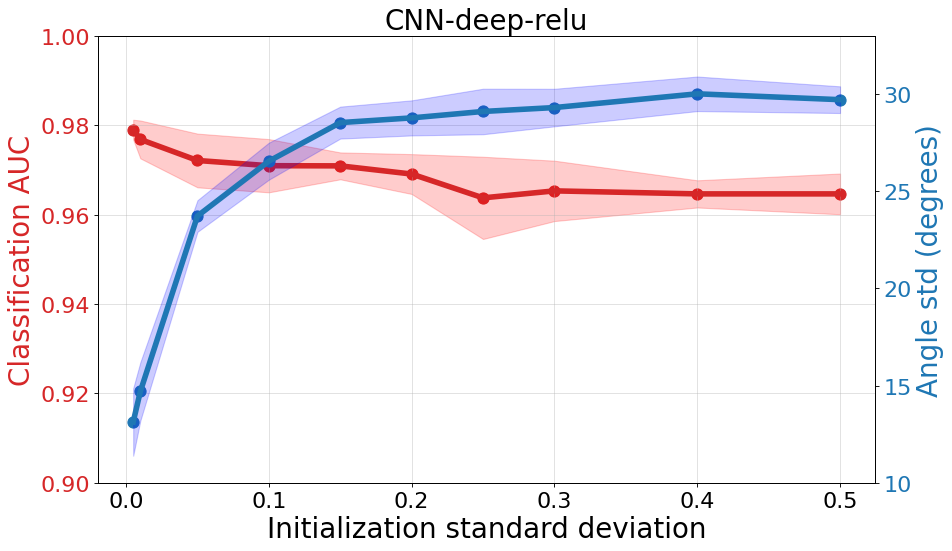

In [21]:
### NEW

experiment_name='CNN-deep-relu'
Performance_graph =np.nanmean(Performance['deep_relu'],axis=-1)   #Performance
Angles_std_graph = np.nanmean(Angles_std['deep_relu'],axis=-1) #Angles_std
Performance_std_graph = np.nanstd(Performance['deep_relu'],axis=-1) #Performance std
Angles_std_std_graph = np.nanstd(Angles_std['deep_relu'],axis=-1) #Std of Angles_std

plotter.plot_initialization(experiment_name, sigmas, Performance_graph, Angles_std_graph, Performance_std_graph, Angles_std_std_graph, y1_min=0.90, y1_max=1, y2_min=10, y2_max=33, labelsize=20, fontsize=25)

# CNN-shallow-relu

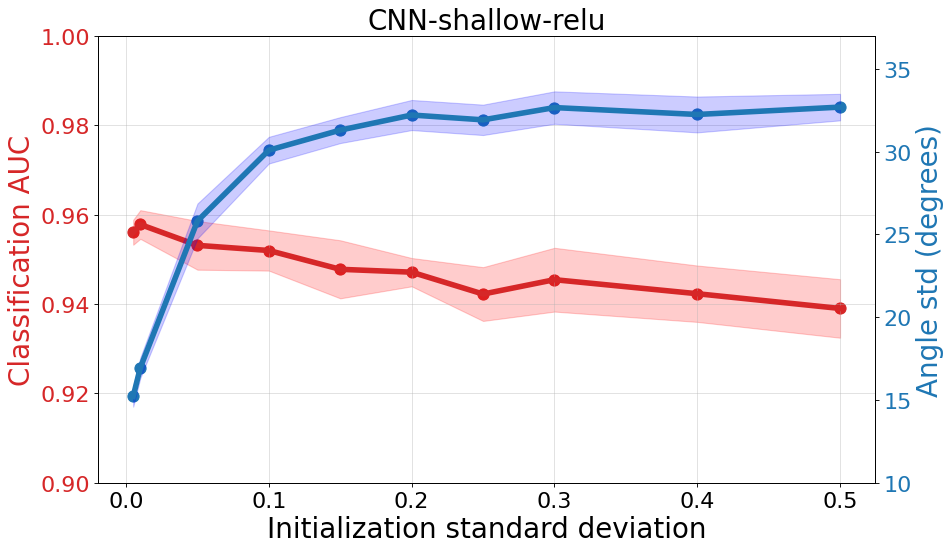

In [20]:
### NEW

experiment_name='CNN-shallow-relu'
Performance_graph =np.nanmean(Performance['shallow_relu'],axis=-1)   #Performance
Angles_std_graph = np.nanmean(Angles_std['shallow_relu'],axis=-1) #Angles_std
Performance_std_graph = np.nanstd(Performance['shallow_relu'],axis=-1) #Performance std
Angles_std_std_graph = np.nanstd(Angles_std['shallow_relu'],axis=-1) #Std of Angles_std

plotter.plot_initialization(experiment_name, sigmas, Performance_graph, Angles_std_graph, Performance_std_graph, Angles_std_std_graph, y1_min=0.90, y1_max=1, y2_min=10, y2_max=37, labelsize=20, fontsize=25)

# CNN-deep-exp

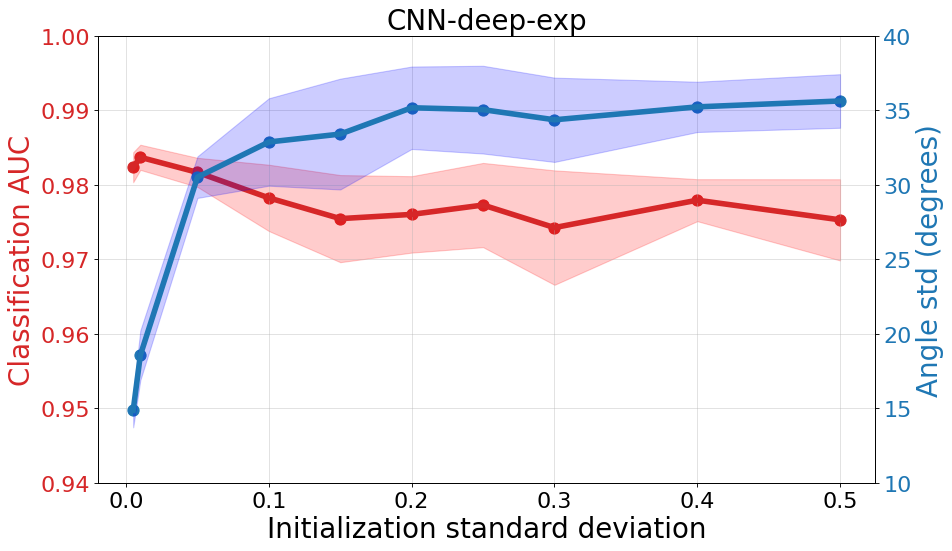

In [19]:
### NEW

experiment_name='CNN-deep-exp'
Performance_graph =np.nanmean(Performance['deep_exp'],axis=-1)   #Performance
Angles_std_graph = np.nanmean(Angles_std['deep_exp'],axis=-1) #Angles_std
Performance_std_graph = np.nanstd(Performance['deep_exp'],axis=-1) #Performance std
Angles_std_std_graph = np.nanstd(Angles_std['deep_exp'],axis=-1) #Std of Angles_std

plotter.plot_initialization(experiment_name, sigmas, Performance_graph, Angles_std_graph, Performance_std_graph, Angles_std_std_graph, y1_min=0.94, y1_max=1, y2_min=10, y2_max=40, labelsize=20, fontsize=25)

# CNN-shallow-exp

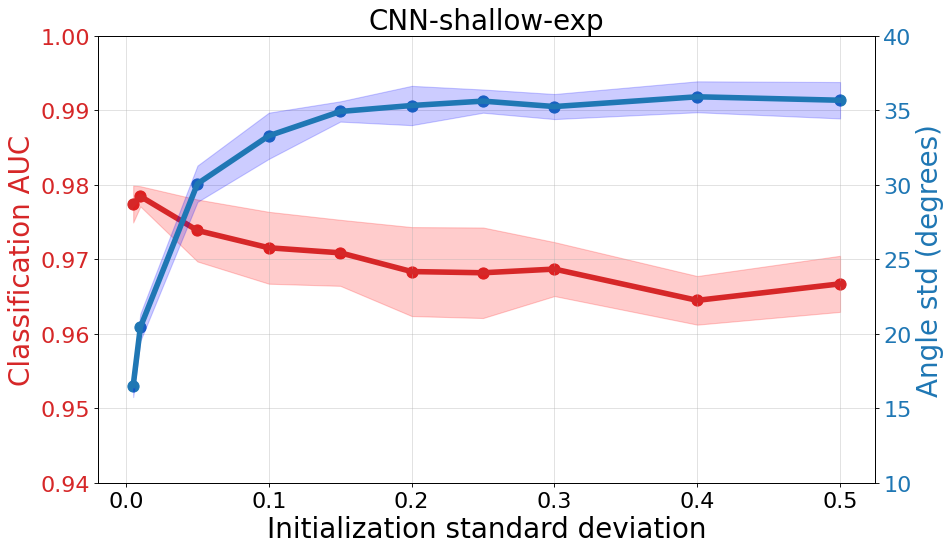

In [18]:
### NEW

experiment_name='CNN-shallow-exp'
Performance_graph =np.nanmean(Performance['shallow_exp'],axis=-1)   #Performance
Angles_std_graph = np.nanmean(Angles_std['shallow_exp'],axis=-1) #Angles_std
Performance_std_graph = np.nanstd(Performance['shallow_exp'],axis=-1) #Performance std
Angles_std_std_graph = np.nanstd(Angles_std['shallow_exp'],axis=-1) #Std of Angles_std

plotter.plot_initialization(experiment_name, sigmas, Performance_graph, Angles_std_graph, Performance_std_graph, Angles_std_std_graph, y1_min=0.94, y1_max=1, y2_min=10, y2_max=40, labelsize=20, fontsize=25)